In [32]:
%matplotlib inline
from ResolveAirport import find_matches

matches = find_matches("new york")
scores = [match[0] for match in matches]
list(map(lambda x: "%.3f %s" % (x[0], x[1]["Name"]), matches))

Exact match for airport Region New York of Weiss Airfield.
Exact match for airport Region New York of Talmage Field.
Exact match for airport Region New York of Klaverack Airport.
Exact match for airport Region New York of Randall Airport.
Exact match for airport Region New York of Murphy Field.
Exact match for airport Region New York of Md1 Airport.
Exact match for airport Region New York of Airhaven Airport.
Exact match for airport Region New York of North Buffalo Suburban Airport.
Exact match for airport Region New York of Berdick Field.
Exact match for airport Region New York of Spring Brook Airport.
Exact match for airport Region New York of Westwind Farm Airport.
Exact match for airport Region New York of Seven Gullies Airport.
Exact match for airport Region New York of Lapeer Flyer Airport.
Exact match for airport Region New York of Rocky Reef Farm Airport.
Exact match for airport Region New York of Lakeview Airport.
Exact match for airport Region New York of Bennetts Airport.
Ex

['35.561 John F Kennedy International Airport',
 '35.410 La Guardia Airport',
 '14.745 Syracuse Hancock International Airport',
 '14.473 Greater Rochester International Airport',
 '14.315 Buffalo Niagara International Airport',
 '11.044 Stewart International Airport',
 '9.775 Elmira Corning Regional Airport',
 '9.769 Dutchess County Airport',
 '9.758 Westchester County Airport',
 '9.748 Watertown International Airport',
 '9.740 Chautauqua County-Jamestown Airport',
 '9.739 Schenectady County Airport',
 '9.732 Adirondack Regional Airport',
 '9.705 Republic Airport',
 '9.689 Albany International Airport',
 '9.679 Griffiss International Airport',
 '9.651 Floyd Bennett Memorial Airport',
 '9.632 Wheeler Sack Army Air Field',
 '9.606 Niagara Falls International Airport',
 '9.590 Greater Binghamton/Edwin A Link field',
 '9.545 Massena International Richards Field',
 '9.529 Plattsburgh International Airport',
 '9.478 Long Island Mac Arthur Airport',
 '9.454 Ithaca Tompkins Regional Airport',


# Jenks Natural Breaks

In [33]:
from jenks import jenks
clusters = jenks(scores, int(max(3, len(matches)/100)))
clusters

[1.0032841, 2.8719308, 5.637619, 11.044212, 14.745144, 35.56052]

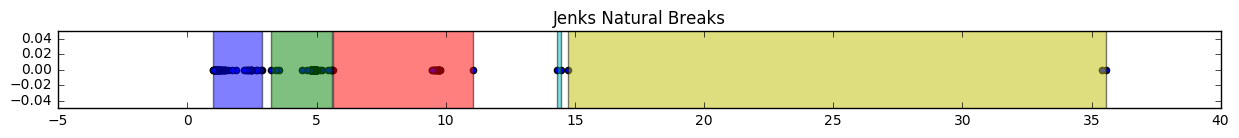

In [34]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import cycle
cycol = cycle('bgrcymk')

fig = plt.figure(figsize=(15,1))
ax = fig.add_subplot(111)
ax.scatter(scores, [0] * len(matches))

boundaries = clusters
boundaries[0] = -100
boundaries[-1] = 100
for left, right in zip(boundaries, boundaries[1:]):
    cluster = list(filter(lambda x: left <= x <= right, scores))
    left = min(cluster)
    right = max(cluster)
    ax.add_patch(patches.Rectangle(
            (left, -1), right-left, 2,
            alpha=0.5,
            facecolor=next(cycol)
        ))

plt.title("Jenks Natural Breaks")
plt.show()

### Top cluster:

In [35]:
list(map(lambda x: x[1]["Name"], filter(lambda x: x[0] >= clusters[-2], matches)))

['John F Kennedy International Airport',
 'La Guardia Airport',
 'Syracuse Hancock International Airport']

# MeanShift

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = np.array(list(zip(scores, np.zeros(len(scores)))), dtype=np.float)
bandwidth = estimate_bandwidth(X, quantile=0.5)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

ms_clusters = []
for k in range(n_clusters_):
    my_members = labels == k
    print("cluster %i: %s" % (k, str(X[my_members, 0])))
    ms_clusters.append(X[my_members, 0])

cluster 0: [ 5.63761905  5.58761905  5.56973545  5.56945317  5.45427417  5.20455026
  5.12857143  5.02538847  5.02205514  5.01729437  5.00927803  5.00880952
  5.0084441   5.00114286  4.99830836  4.99663004  4.98780952  4.98683983
  4.98650053  4.98424242  4.98296104  4.98247619  4.98247619  4.98095238
  4.97892063  4.9774359   4.9758555   4.97553114  4.97547619  4.97547619
  4.97467787  4.97372562  4.97347619  4.97333333  4.97134576  4.97081064
  4.97047619  4.96914792  4.96647619  4.96606061  4.96606061  4.96553501
  4.96483766  4.96289855  4.96289855  4.9626501   4.96208909  4.96124542
  4.96047619  4.96        4.95920346  4.95851541  4.95847619  4.95838828
  4.95822323  4.95792208  4.95733333  4.95733333  4.95666667  4.95518207
  4.95518207  4.95341933  4.95314286  4.95302165  4.95282913  4.95265801
  4.95259259  4.95137255  4.95137255  4.9510559   4.95047619  4.95047619
  4.949599    4.94902428  4.94857143  4.94787879  4.94787879  4.94714286
  4.94714286  4.94550725  4.94550725  4.

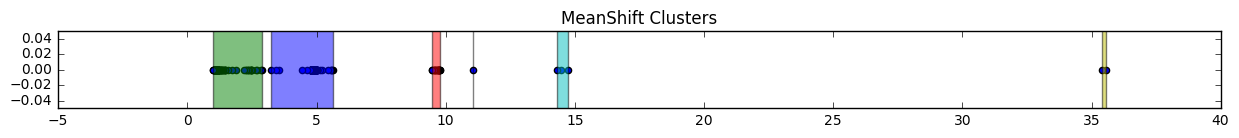

In [37]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import cycle
cycol = cycle('bgrcymk')

fig = plt.figure(figsize=(15,1))
ax = fig.add_subplot(111)
ax.scatter(scores, [0] * len(matches))

for c in ms_clusters:
    left = min(c)
    right = max(c)
    ax.add_patch(patches.Rectangle(
            (left, -1), right-left, 2,
            alpha=0.5,
            facecolor=next(cycol)
        ))

plt.title("MeanShift Clusters")
plt.show()

### Top cluster

In [38]:
max_cluster = ms_clusters[0]
for c in ms_clusters[1:]:
    if max(c) > max(max_cluster):
        max_cluster = c

list(map(lambda x: x[1]["Name"], filter(lambda x: x[0] >= min(max_cluster), matches)))

['John F Kennedy International Airport', 'La Guardia Airport']